<a href="https://colab.research.google.com/github/vasuaw/Truck_numberPlate_Computer_vision/blob/main/truck_number_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## all imports

import imutils
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

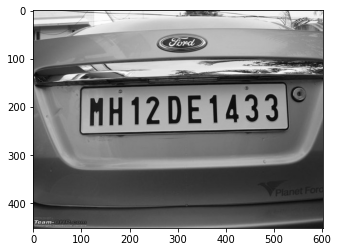

In [ ]:
img = cv2.imread('img6.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

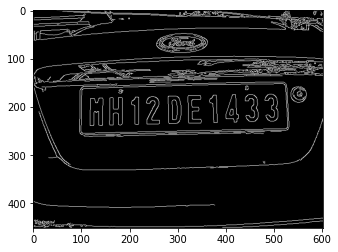

In [ ]:
bfilter = cv2.bilateralFilter(gray_img, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
x = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        x = approx
        break

In [ ]:
x

array([[[526, 155]],

       [[104, 158]],

       [[ 96, 252]],

       [[525, 249]]], dtype=int32)

In [ ]:
mask = np.zeros(gray_img.shape, np.uint8)
new_image = cv2.drawContours(mask, [x], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

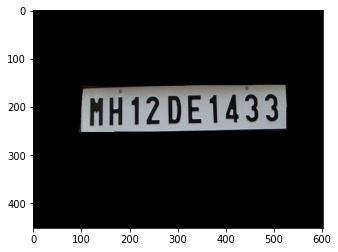

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:

(a,b)=np.where(mask==255)
(a1,b1)=(np.min(a), np.min(b))
(a2,b2)=(np.max(a), np.max(b))
crop=gray_img[a1:a2+1, b1:b2+1]

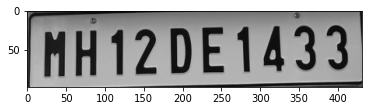

In [ ]:
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

In [ ]:
## Reading Test
read=easyocr.Reader(['en'])
result=read.readtext(crop)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[10, 6], [428, 6], [428, 98], [10, 98]],
  'MH12 DE 1433',
  0.48203362336955663)]

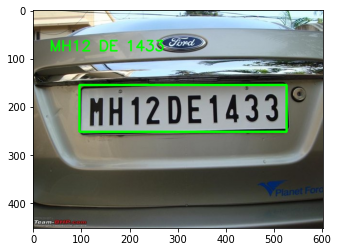

In [ ]:
output = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
final = cv2.putText(img, text=output, org=(x[1][0][0]-70, x[1][0][0]-20), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
final = cv2.rectangle(img, tuple(x[0][0]), tuple(x[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))